In [29]:
import pandas as pd
import datamol as dm

data_clean = pd.read_csv("data/clean_subset.csv")

ic50_clean = pd.read_csv("data/ic50_clean.csv")


mols = [dm.to_mol(smi, add_hs=False) for smi in ic50_clean['standard_smiles']]
scaffolds_ic50 = [dm.to_scaffold_murcko(mol) for mol in mols]

mols = [dm.to_mol(smi, add_hs=False) for smi in data_clean['standard_smiles']]
scaffolds_data = [dm.to_scaffold_murcko(mol) for mol in mols]

scaffolds_ic50_set = set(scaffolds_ic50)
scaffolds_data_set = set(scaffolds_data)

print(f"IC50 scaffolds count: {len(scaffolds_ic50_set)}")
print(f"Data scaffolds count: {len(scaffolds_data_set)}")
print(f"Common scaffolds: {len(scaffolds_ic50_set & scaffolds_data_set)}")
print(f"IC50 only scaffolds: {len(scaffolds_ic50_set - scaffolds_data_set)}")
print(f"Data only scaffolds: {len(scaffolds_data_set - scaffolds_ic50_set)}")

IC50 scaffolds count: 457
Data scaffolds count: 1925
Common scaffolds: 0
IC50 only scaffolds: 457
Data only scaffolds: 1925


Была мысль сделать докинг библиотеки, так как заметил в ic50 Nilotinib и dasatinib - это ингибиторы тирозинкиназ. 

Можно было взять 2GQG и задочить в него, отсеяв лишнее. Но поиск по скаффолдам говорит, что это разные наборы
 
Да и глазами я просмотрел - это очень отличающиеся датасеты, и я сильно сомневаюсь, что в библиотеке будет ингибитор тирозинкиназ


В целом библиотека мне кажется довольно средней и не современной.

По этому я просто отберу молелкулы фильтрами, без мишени

Был пропущен этап где я насчитал SYBA и выкинул соединения со скором меньше 25

Был пропущен этап где я насчитал mce-18 и выкинул всю старую химию со значением меньше 55

In [2]:
import pandas as pd
import datamol as dm

data_clean_calc = pd.read_csv("data/data_clean_SA_MCE-18.csv")

mols = [dm.to_mol(smi, add_hs=False) for smi in data_clean_calc['standard_smiles']]
df = dm.descriptors.batch_compute_many_descriptors(mols)

data_clean_calc = data_clean_calc.join(df)
data_clean_calc = data_clean_calc[data_clean_calc.qed > 0.3]

Насчитал Дескрипторы и поставил фильрты QED>0.3, но он не сильно нужен, все и так хорошо

In [3]:
scores = pd.read_csv("data/scores.csv")


data_clean_calc = data_clean_calc.join(scores)
data_clean_calc.score

0      -7.159951
1       7.544092
2      11.011850
3      -1.580276
4      -7.116295
         ...    
469    -0.875945
470    -4.527912
471     4.547746
472     1.343474
473    -6.196732
Name: score, Length: 474, dtype: float64

In [4]:
import mols2grid

#mols2grid.display(data_clean_calc, smiles_col="standard_smiles", subset=["syba_score", "mce18", "qed", "score"])

В итоге Выбрал руками, приглянувшиеся соединения

In [ ]:
import pandas as pd

hits = pd.read_csv("data/selection.csv", sep=";")
# OR
hits = pd.read_csv("data/selection.smi", sep=" ")

hits

,smiles,id
0,Cn1nnnc1SCC(=O)C12CC3CC(CC(C3)C1)C2,403
1,O=C(NCC1CCCO1)NC12CC3CC(CC(C3)C1)C2,102
2,CC12CCC(C(=O)NC3CCCCC3)(CC1=O)C2(C)C,458
3,c1csc(-c2cnc(N3CCC4(CC3)OCCO4)nc2)c1,201
4,CCOC(=O)C(C)Oc1ccc2c3c(c(=O)oc2c1C)CCC3,151
5,O=C(NC1CCCC1)C1CCCN(S(=O)(=O)N2CCCC2)C1,46
6,CC1(C)CC2CC(C)(CN2C(=O)c2ccc(F)cc2)C1,136
7,O=C(CC1Sc2ccccc2N=C1O)Nc1ccc(F)cc1F,71
8,Cc1ccc(N2C(=O)c3[nH]nc(C)c3C2c2cccnc2)cc1,319
9,Cc1ccc(N2CC(NC(=O)C3CC3)CC2=O)cc1C,198


## Дополнительно для Хитов насчитал ADMET

Использовал сервис [SwissADME](http://www.swissadme.ch/index.php)

Результаты лежат в файле `data/swissadme.csv`

### Дополнительно, что бы Следовать заданию выбрал из 500 наиболее разнообразные 25

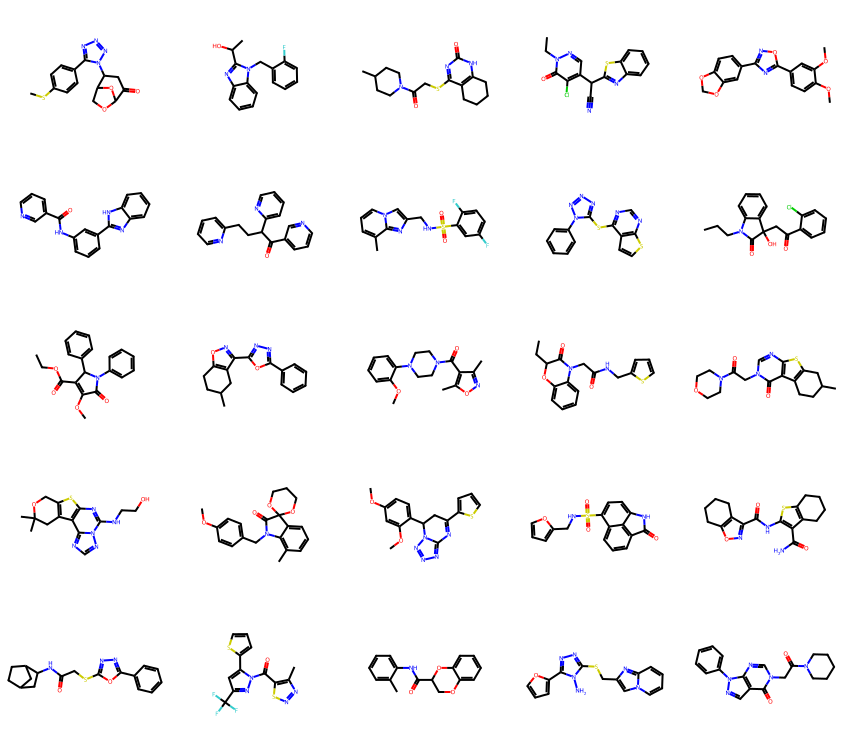

In [11]:
indices, centroids = dm.pick_centroids(mols, npick=25, threshold=0.7, method="sphere", n_jobs=-1)
dm.to_image(centroids, mol_size=(170, 150), n_cols=5)

In [18]:
centroids_smiles = dm.to_smiles(centroids)
if centroids_smiles is not None:
    hit_list = data_clean_calc[data_clean_calc.standard_smiles.isin(centroids_smiles)]
else:
    hit_list = data_clean_calc.iloc[indices]
hit_list.to_csv("data/hit_list.csv", index=False)

Финальный Список Хитов ```data/hit_list.csv```